# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [1]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 1.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
  Created wheel for pyinstrument-cext: filename=pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl size=6294 sha256=b900dab6e22d8de74f247d64dd7711e93b19e89fb18cb0192fa6d4a63e61eb27
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0f/8b/7a/5f7fd1dd6d3cbb3d350d4c832c5e2f962687749f6d67d573a6
Successfully built pyinstrument-cext
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


In [2]:
!pip install --upgrade bokeh==2.4.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 72.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-3.4.1


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "project/data"

role = sagemaker.get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [3]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2024-08-13 18:45:05--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.80, 52.219.113.152, 52.219.120.176, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

100%[====================================>] 1,132,023,110 43.6MB/s   in 40s    

2024-08-13 18:45:45 (27.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg

In [19]:
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
print("input spec (in this case, just an S3 path): {}".format(inputs))

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-065326103865/project/data


In [4]:
inputs = f's3://{bucket}/{prefix}/'
print(inputs)

s3://sagemaker-us-east-1-065326103865/project/data/


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [3]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "epochs":IntegerParameter(1,4),
    "batch-size": CategoricalParameter([32, 64, 128, 256]),
}


In [4]:
from sagemaker.pytorch import PyTorch
#TODO: Create estimators for your HPs

# TODO: Your estimator here

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge"
)


In [5]:
# TODO: Your HP tuner here
objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing loss: ([0-9\\.]+)"}]

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [ ]:
# TODO: Fit your HP Tuner
# TODO: Remember to include your data channels
tuner.fit({"training": inputs})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...............................................................................................................................................................................................................................................................................................................................................................................................................................................

In [8]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2024-08-16 21:55:28 Starting - Preparing the instances for training
2024-08-16 21:55:28 Downloading - Downloading the training image
2024-08-16 21:55:28 Training - Training image download completed. Training in progress.
2024-08-16 21:55:28 Uploading - Uploading generated training model
2024-08-16 21:55:28 Completed - Resource reused by training job: pytorch-training-240816-2050-004-90cfbb39


{'_tuning_objective_metric': '"Test Loss"',
 'batch-size': '"32"',
 'epochs': '4',
 'lr': '0.013351091326965773',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2024-08-16-20-50-17-672"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-16-20-50-17-672/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [32]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile, DebuggerHookConfig, CollectionConfig

# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport())
]

collection_configs = [
    CollectionConfig(
        name="custom_losses",
        parameters={
            "include_regex": "CrossEntropyLoss_output_0",
            "train.save_interval": "100",
            "eval.save_interval": "5"
        }
    )
]

In [35]:
debugger_config = DebuggerHookConfig(collection_configs=collection_configs)

In [36]:
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [37]:
hyperparameters = {
    "batch-size": 32,
    "epoch": 4,
    "lr": 0.01335,
}

In [38]:
from sagemaker.pytorch import PyTorch
# TODO: Create and fit an estimator

# TODO: Your estimator here

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.xlarge",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    rules=rules,
    debugger_hook_config=debugger_config,
)

In [39]:
estimator.fit({"training": inputs})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framewo

2024-08-17 08:45:49 Starting - Starting the training job...
2024-08-17 08:46:16 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2024-08-17 08:46:41 Downloading - Downloading input data......
2024-08-17 08:47:41 Downloading - Downloading the training image...
2024-08-17 08:48:17 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-08-17 08:48:02,126 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-08-17 08:48:02,129 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-08-17 08:48:02,140 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-

In [40]:
# TODO: Plot a debugging output.
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)


In [41]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial.tensor_names()

[2024-08-17 09:09:37.785 ip-172-16-46-62.ec2.internal:12032 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/debug-output
[2024-08-17 09:09:39.551 ip-172-16-46-62.ec2.internal:12032 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2024-08-17 09:09:40.568 ip-172-16-46-62.ec2.internal:12032 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer4.0.relu_input_0',
 'layer4.0.relu_input_1',
 'layer4.1.relu_input_0',
 'layer4.1.relu_input_1',
 'relu_input_0']

In [42]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

9
22


In [43]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


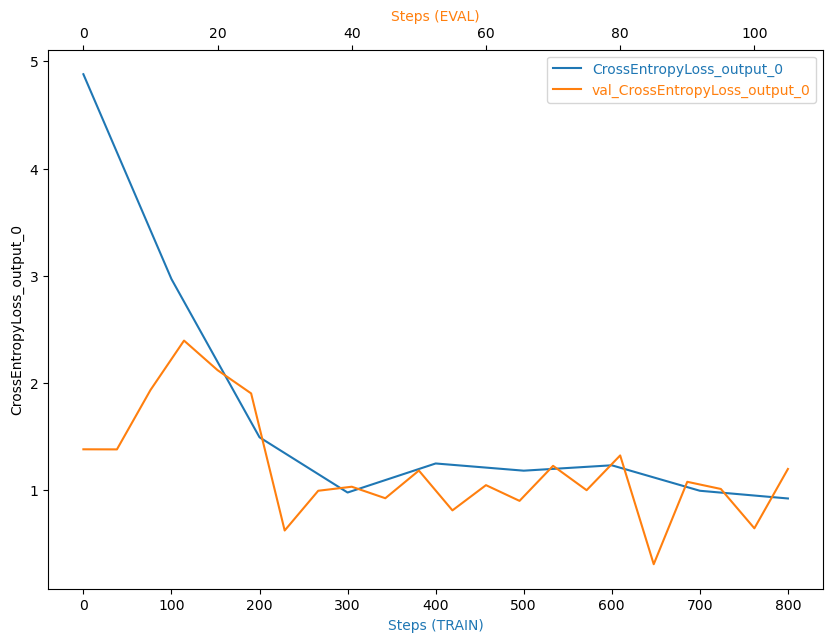

In [45]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [46]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/rule-output


In [47]:
! aws s3 ls {rule_output_path} --recursive

2024-08-17 09:08:38     375469 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-08-17 09:08:37     223399 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-08-17 09:08:32        192 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-08-17 09:08:32        200 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-08-17 09:08:32       1970 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2024-08-17 09:08:32        127 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2024-08-17 09:08:32        199 pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-re

In [48]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallSystemUsage.json to ProfilerReport/profiler-output/profiler-reports/OverallSystemUsage.json
download: s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/rule-output/ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json to ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json
download: s3://sagemaker-us-east-1-065326103865/pytorc

In [19]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]][0]

In [49]:
import IPython

IPython.display.HTML(filename="./ProfilerReport/profiler-output/profiler-report.html")

In [50]:
import boto3

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")

Training jobname: pytorch-training-2024-08-17-08-45-48-485


In [51]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-065326103865/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-08-45-48-485/profiler-output


Profiler data from system is available


In [52]:
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2024-08-17 09:11:40.548 ip-172-16-46-62.ec2.internal:12032 INFO metrics_reader_base.py:134] Getting 23 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'CPUUtilization-nodeid:algo-1'}


## Model Deploying

In [32]:
# TODO: Deploy your model to an endpoint

# TODO: Add your deployment configuration like instance type and number of instances

predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.m5.xlarge")

INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-01-09-33-139/output/model.tar.gz), script artifact (s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-01-09-33-139/source/sourcedir.tar.gz), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-02-35-22-730/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-training-2024-08-17-02-35-22-730
INFO:sagemaker:Creating endpoint-config with name pytorch-training-2024-08-17-02-35-22-730
INFO:sagemaker:Creating endpoint with name pytorch-training-2024-08-17-02-35-22-730


--------------!

In [1]:
import json
import boto3
import sagemaker
from sagemaker import get_execution_role
from IPython.core.display import Image, display
from sagemaker.pytorch import PyTorchModel

sagemaker_session = sagemaker.Session()
boto3 = sagemaker_session.boto_session
s3 = boto3.client("s3")
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()


model_data = 's3://sagemaker-us-east-1-065326103865/pytorch-training-2024-08-17-02-35-22-730/model.tar.gz'
image = '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:1.8-cpu-py36'
model_name = 'pytorch-training-2024-08-17-02-35-22-730'


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


/tmp/ipykernel_14328/2273389406.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


In [17]:
pytorch_model = PyTorchModel(model_data = model_data,
                            role=role,
                            entry_point='inference.py',
                            py_version='py36',
                            framework_version='1.8')

predictor=pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

-------!

In [24]:
import random


def generate_test_case():
    # Setup s3 in boto3
    s3 = boto3.resource('s3')
    
    # Randomly pick from sfn or test folders in our bucket
    objects = s3.Bucket(bucket).objects.filter(Prefix='project/data/test')
    
    # Grab any random object key from that folder!
    obj = random.choice([x.key for x in objects])
    
    return obj
        
pick = generate_test_case()

print(pick.split('/')[3])
print(pick.split('/')[4])

046.Cavalier_king_charles_spaniel
Cavalier_king_charles_spaniel_03291.jpg


In [31]:
# TODO: Run an prediction on the endpoint

from sagemaker.predictor import Predictor
from sagemaker.serializers import IdentitySerializer

predictor.serializer = IdentitySerializer('image/jpeg')

pick = generate_test_case()

s3.download_file(bucket, pick, pick.split('/')[4])

with open(pick.split('/')[4], "rb") as file:
    body = file.read()
    response = predictor.predict(body)


In [26]:
import numpy as np

file_list = sagemaker_session.list_s3_files(bucket=bucket, key_prefix='project/data/test')
class_list = np.unique([file.split('/')[3] for file in file_list])


In [27]:
print(class_list)

['001.Affenpinscher' '002.Afghan_hound' '003.Airedale_terrier' '004.Akita'
 '005.Alaskan_malamute' '006.American_eskimo_dog' '007.American_foxhound'
 '008.American_staffordshire_terrier' '009.American_water_spaniel'
 '010.Anatolian_shepherd_dog' '011.Australian_cattle_dog'
 '012.Australian_shepherd' '013.Australian_terrier' '014.Basenji'
 '015.Basset_hound' '016.Beagle' '017.Bearded_collie' '018.Beauceron'
 '019.Bedlington_terrier' '020.Belgian_malinois' '021.Belgian_sheepdog'
 '022.Belgian_tervuren' '023.Bernese_mountain_dog' '024.Bichon_frise'
 '025.Black_and_tan_coonhound' '026.Black_russian_terrier'
 '027.Bloodhound' '028.Bluetick_coonhound' '029.Border_collie'
 '030.Border_terrier' '031.Borzoi' '032.Boston_terrier'
 '033.Bouvier_des_flandres' '034.Boxer' '035.Boykin_spaniel' '036.Briard'
 '037.Brittany' '038.Brussels_griffon' '039.Bull_terrier' '040.Bulldog'
 '041.Bullmastiff' '042.Cairn_terrier' '043.Canaan_dog' '044.Cane_corso'
 '045.Cardigan_welsh_corgi' '046.Cavalier_king_char

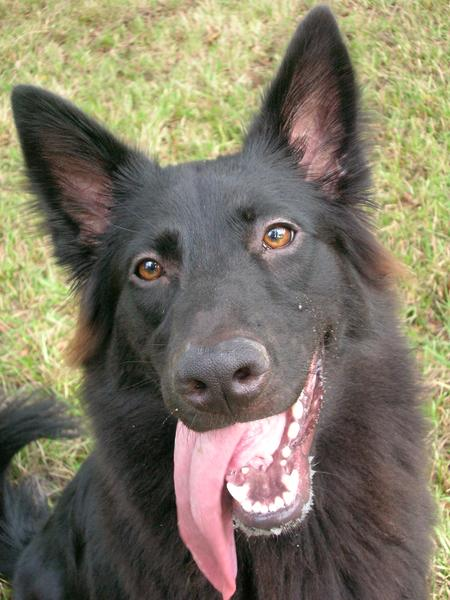

Image lable is 021.Belgian_sheepdog
Prediction is 021.Belgian_sheepdog


In [34]:
display(Image(filename=pick.split('/')[4]))
print('Image lable is {}'.format(pick.split('/')[3]))
print('Prediction is {}'.format(class_list[response.argmax()]))

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()